In [1]:
# numpy library
import numpy as np

# pandas library
import pandas as pd

# tensorflow and keras library
import tensorflow as tf
from tensorflow import keras

# Load data and Pre-processing
boston_housing = keras.datasets.boston_housing
(train_data, train_target), (test_data, test_target) = boston_housing.load_data()

# Shuffle the training set and split to training and testing data
order = np.argsort(np.random.random(train_target.shape))
train_data = train_data[order]
train_target = train_target[order]

print("Training Set Size: {}".format(train_data.shape))
print("Testing Set Size: {}".format(test_data.shape))
print("The first dataset：\n", train_data[0])

Training Set Size: (404, 13)
Testing Set Size: (102, 13)
The first dataset：
 [7.8750e-02 4.5000e+01 3.4400e+00 0.0000e+00 4.3700e-01 6.7820e+00
 4.1100e+01 3.7886e+00 5.0000e+00 3.9800e+02 1.5200e+01 3.9387e+02
 6.6800e+00]


In [2]:
# Make column name for each feature and print first 5 row of dataset and first 10 train target
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df = pd.DataFrame(train_data, columns=column_names)
print(df.head())
print(train_target[0:10])

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
0  0.07875  45.0   3.44   0.0  0.437  6.782  41.1  3.7886   5.0  398.0   
1  4.55587   0.0  18.10   0.0  0.718  3.561  87.9  1.6132  24.0  666.0   
2  0.09604  40.0   6.41   0.0  0.447  6.854  42.8  4.2673   4.0  254.0   
3  0.01870  85.0   4.15   0.0  0.429  6.516  27.7  8.5353   4.0  351.0   
4  0.52693   0.0   6.20   0.0  0.504  8.725  83.0  2.8944   8.0  307.0   

   PTRATIO       B  LSTAT  
0     15.2  393.87   6.68  
1     20.2  354.70   7.12  
2     17.6  396.90   2.98  
3     17.9  392.43   6.36  
4     17.4  382.00   4.63  
[32.  27.5 32.  23.1 50.  20.6 22.6 36.2 21.8 19.5]


In [3]:
# Calculate the mean and standard deviation by column as train data and test data usage
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std
print(train_data[0])  # First training sample , normalized

[-0.39725269  1.41205707 -1.12664623 -0.25683275 -1.027385    0.72635358
 -1.00016413  0.02383449 -0.51114231 -0.04753316 -1.49067405  0.41584124
 -0.83648691]


In [16]:
# Define model
# The first layer has 896: (13+1)*64 parameters
# The second layer has 4160: (64+1)*64 parameters
# The third layer has 65: (64+1)* parameters
def build_model():
    model = keras.Sequential()
    model.add(keras.layers.Dense(64, activation=tf.nn.relu, kernel_initializer='normal', 
                                 input_shape=(train_data.shape[1],)))
    model.add(keras.layers.Dense(64, activation=tf.nn.relu, kernel_initializer='normal'))
    model.add(keras.layers.Dense(1))
    optimizer = tf.train.RMSPropOptimizer(0.001)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_absolute_error'])
    return model


model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________



....................................................................................................
...................................................................

<Figure size 432x288 with 0 Axes>

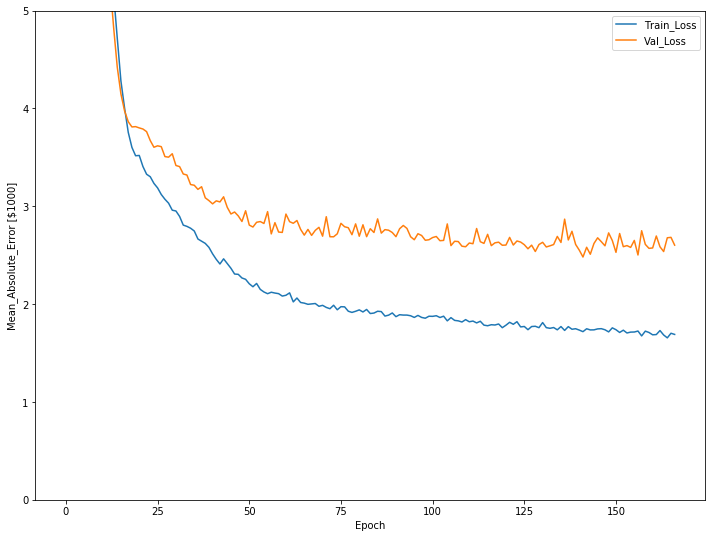

In [17]:
# matplotlib library
import matplotlib.pyplot as plt

# Training the model with Epochs set to 500
EPOCHS = 500

# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            print('')  # change new line every 100 epoch
        print('.', end='')

# The patience parameter is the amount of epochs to check for improvement
# To prevent over-fitting and early callback for stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=EPOCHS/20)

# Store training stats
history = model.fit(train_data, train_target, epochs=EPOCHS, validation_split=0.2, verbose=0, 
                    callbacks=[early_stop, PrintDot()])

# Define plot_history function for plotting loss graph
def plot_history(history):
    Dict = history.history
    plt.figure()
    plt.figure(figsize=(12, 9))
    plt.xlabel('Epoch')
    plt.ylabel('Mean_Absolute_Error [$1000]')
    plt.plot(history.epoch, np.array(Dict['mean_absolute_error']), label='Train_Loss')
    plt.plot(history.epoch, np.array(Dict['val_mean_absolute_error']), label='Val_Loss')
    plt.legend()
    plt.ylim([0, 5])

plot_history(history)

In [18]:
# Evaluate the test data
[loss, mae] = model.evaluate(test_data, test_target, verbose=1)
print("\nTesting set Mean_Absolute_ Error: ${:7.2f}".format(mae * 1000)

102/102 [==============================] - 0s 42us/sample - loss: 21.2931 - mean_absolute_error: 2.9045

Testing set Mean_Absolute_ Error: $2904.45


<Figure size 432x288 with 0 Axes>

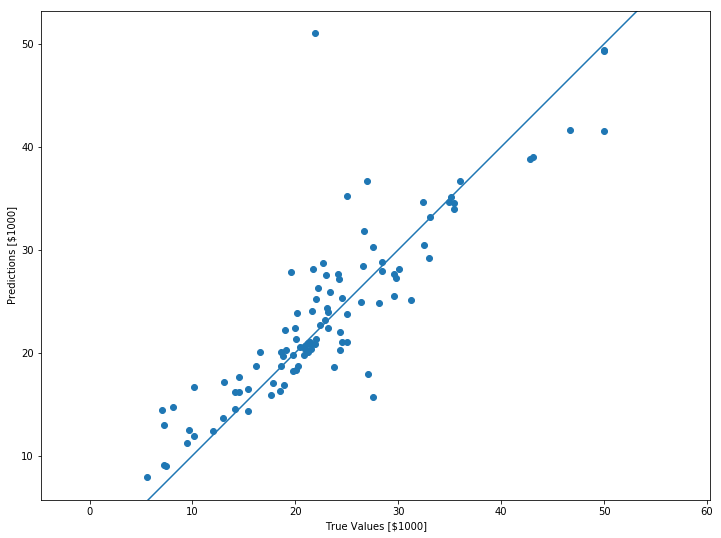

In [21]:
# Prediction the result
test_predictions = model.predict(test_data)
test_predictions = test_predictions.flatten(order='C')

plt.figure()
plt.figure(figsize=(12, 9))
plt.scatter(test_target, test_predictions)
plt.xlabel('True Values [$1000]')
plt.ylabel('Predictions [$1000]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100])

Text(0, 0.5, 'Count')

<Figure size 432x288 with 0 Axes>

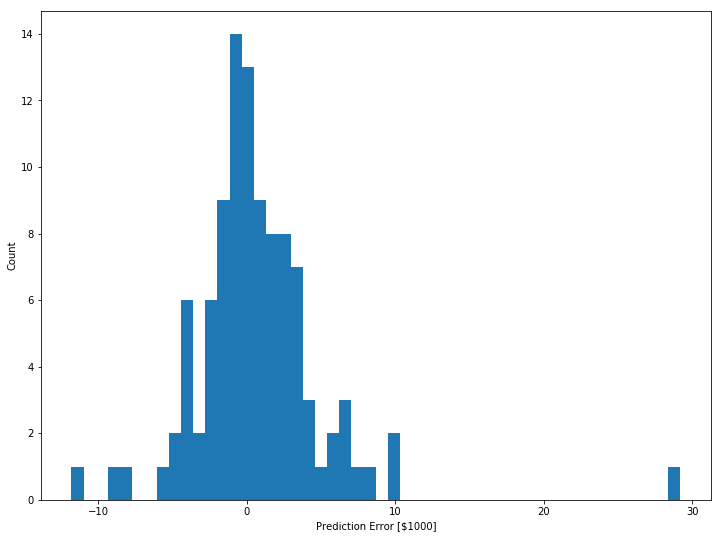

In [25]:
# Divide error to 50 pieces and check the amount of error for each piece
plt.figure()
plt.figure(figsize=(12, 9))
error = test_predictions - test_target
n, bins, patches = plt.hist(error, bins=50)
plt.xlabel("Prediction Error [$1000]")
plt.ylabel("Count")

In [26]:
print(type(n), type(bins), type(patches))
print(n, bins)

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'matplotlib.cbook.silent_list'>
[ 1.  0.  0.  1.  1.  0.  0.  1.  2.  6.  2.  6.  9. 14. 13.  9.  8.  8.
  7.  3.  1.  2.  3.  1.  1.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.] [-11.80715561 -10.98753056 -10.16790552  -9.34828047  -8.52865543
  -7.70903038  -6.88940533  -6.06978029  -5.25015524  -4.4305302
  -3.61090515  -2.79128011  -1.97165506  -1.15203001  -0.33240497
   0.48722008   1.30684512   2.12647017   2.94609521   3.76572026
   4.58534531   5.40497035   6.2245954    7.04422044   7.86384549
   8.68347054   9.50309558  10.32272063  11.14234567  11.96197072
  12.78159576  13.60122081  14.42084586  15.2404709   16.06009595
  16.87972099  17.69934604  18.51897108  19.33859613  20.15822118
  20.97784622  21.79747127  22.61709631  23.43672136  24.25634641
  25.07597145  25.8955965   26.71522154  27.53484659  28.35447163
  29.17409668]
